# Programmation de la classe noeud

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Structure de la classe Noeuds

La classe noeud va nous permettre d'avoir une structure de données qui va contenir les données du problème. Nous allons coder ainsi un ensemble de méthodes, qui vont nous permettre de manipuler cet ensemble de données.

```
class Node :

    # attributs

    _N
    _a
    _d
    _q

    # méthodes de classes
     _to_string()

    _schrage_schedule()

    _construct_conjonctive(schedule)

    _longest_path(schedule)

    _schrage_makespan()

    _critical_search()

    



```

In [2]:
class Node :

    def __init__ (self , N , a , d , q) :

        self._N = []
        self._a = {}
        self._d = {}
        self._q = {}

        k = 0

        for i in N :

            self._N.append(i)
            self._a[i] = a[k]
            self._q[i] = q[k]
            self._d[i] = d[k]

            k+=1

Creation of a first node. This first node, is the node that is given 

In [3]:
''' 
Beware the different set have to be sorted with respect to N
'''

N = list(range(1,8))
a = [10,13,11,20,30,0,30]
d = [5,6,7,4,3,6,2]
q = [7,26,24,21,8,17,0]

e = Node(N,a,d,q)

### Implémentation des méthodes de classe.

Nous allons dans la suite programmer les différentes méthodes de la classe **Node**, et les ajouter à notre structure, à l'aide de la fonction **setattr** que propose R

#### Une méthode d'affichage

Cette première méthode d'affichage, permettra par la suite de venir afficher notre noeud. Elle ne nous servira que pour des petites instances de notre problème.

In [4]:
def _to_string(self) :

    '''
    print of the node
    '''

    print("Task : " , end =" ")

    for i in self._N :
        print(i , end = " ")
    print()
    print("       ",end = " ")

    for i in self._N :
        s = str(self._a[i])
        print(s , end = " ")
    print()
    print("       ",end = " ")
    for i in self._N :
        s = str(self._d[i])
        print(s , end = " ")
    print()
    print("       ",end = " ")
    for i in self._N :
        s = str(self._q[i])
        print(s , end = " ")

setattr(Node , "_to_string" , _to_string)

e._to_string()

Task :  1 2 3 4 5 6 7 
        10 13 11 20 30 0 30 
        5 6 7 4 3 6 2 
        7 26 24 21 8 17 0 

#### Travail sur le graphe de conjonction

Dans cette section nous allons travailler sur le graphe de conjonction associé à une programmation de Schrage. Ce graphe de programmation joue un rôle essentiel, que nous allons bien expliquer par la suite.

- La première fonction prend en argument simplement une programmation (une permutation de notre ensemble de tache), et va venir construire le graphe de conjonction associé à cette programmation. La sortie de cette fonction est un graphe networkx orienté (**nx.DiGraph**)

- La seconde fonction prend en argument aussi une programmation. Elle vient construire le graphe de conjonction, et trouve ensuite le plus long chemin dans ce graphe. Elle rend un dictionnaire python avec une valeur de plus long chemin, et un chemin.

Dans cette partie on pourra en faite s'amuser à venir optimiser notre fonction de recherche de plus long chemin.

In [5]:
def _construct_conjonctive (self , schedule):
    ''' 
    output : the conjonctive graph for a given schedule
    '''

    # construction of a directed graph :
    G = nx.DiGraph() 

    # construction of the submit :

    sbm = ['s','t']+schedule
    G.add_nodes_from(sbm)

    # construction of the edges.
    # shcedule --> permutation of element of self._N


    for i in range(len(schedule)) :

        curr = schedule[i]
        
        e1 = ("s",curr , self._a[curr])
        e2 = (curr,"t",self._q[curr]+self._d[curr])
        # we check if we are at the last task of the schedule
        if i != len(schedule)-1 :
            next = schedule[i+1]
            e3 = (curr,next,self._d[curr]) # creation of the last edges.
            G.add_weighted_edges_from([e1,e2,e3])
        else :
            G.add_weighted_edges_from([e1,e2])
    
    # we return the conjunctive graph.
    return(G)

setattr(Node , "_construct_conjonctive" , _construct_conjonctive)



In [23]:
def _print_graph(self , schedule , path ,Larg , Haut) :
    
    G = self._construct_conjonctive(schedule)

    # color of the edges
    for (u,v) in G.edges():
        G[u][v]['color'] = 'grey'

    for k in range(len(path)) :
        curr = path[k] # current note
        if k==0 :
            next = path[k+1]
            G['s'][curr]['color'] = 'red'
            G[curr][next]['color'] = 'red'

        elif k == len(path)-1 :
            G[curr]['t']['color'] = 'red'

        else :

            next = path[k+1]
            G[curr][next]['color'] = 'red'

    colors = [G[u][v]['color'] for u,v in G.edges()]
    weights = [G[u][v]['weight'] for u,v in G.edges()]

    # color of the nodes
    couleurs_sommets = ["yellow"] * G.number_of_nodes()   


    pos = {} # positions of the node.
    
    set_x = 0
    set_y = len(schedule)*100
    dy = -200

    
    for t in schedule : 
        pos[t] = [set_x , set_y]
        set_y += dy

    # position of the sources nodes.
    pos['s'] = [-1 , 0]
    pos['t'] = [1, 0]


    options = {
    'node_color' : couleurs_sommets,
    'node_size'  : 550,
    'pos' : pos,
    'edge_color' : colors,
    'with_labels': True,
    }

    fig = plt.figure(figsize=(Larg,Haut))
    nx.draw(G,**options)
    labels = nx.get_edge_attributes(G,'weight')


    nx.draw_networkx_edge_labels(G,edge_labels = labels,pos = pos)
    # title of the print
    plt.title("Conjunctive graph associate with : {}".format(schedule))
    plt.show()

setattr(Node , "_print_graph" , _print_graph)

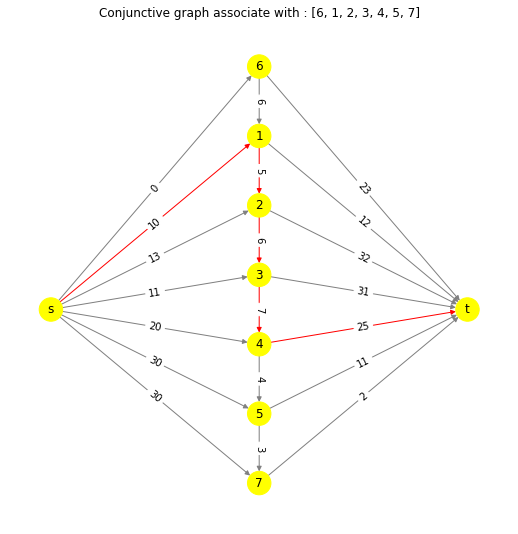

In [24]:
tab = [6, 1, 2, 3, 4, 5, 7] # schedule of the subject
e._print_graph(tab , [1, 2, 3, 4] ,7,7) # print of the schedule.

The objective now is to create an algorithme that find the longest path in this graph. Because of the structure of the graph, we can add somme intelligence to the alogrithm. We will first parcour, all the node in the schedule. Then we will look at the output node *t*

In [10]:
def _longest_path(self, schedule):
    '''
    output : python dictionnary
        - value : the length of the longest past
        - path : the tasks of N in the path.
    '''
    G = self._construct_conjonctive(schedule) # construction of the conjunctive graph.

    nds = ["s"]+schedule+["t"] # nodes in the graph
    L = {} # dictionnary that will contain the distances
    pred = {} # dictionnary that will contain the predecessors
    n = len(G.nodes()) # number of 

    # init of the values
    for k in nds :
        if k=="s" :
            L[k] = 0
            pred[k] = "s"

        elif k!='t':
            # we can at least do this for the nodes in the middle
            L[k] = self._a[k]
            pred[k] = "s"

        else :
            L[k] = -math.inf


    for i in range(len(schedule)) :
        # on regarde pour le sommet d'après.
        
        curr = schedule[i] # current node to treat.
        if i != len(schedule)-1 :
            next = schedule[i+1] # next node in the order.
            new_L = L[curr]+self._d[curr]

            if (new_L > L[next]) :
                L[next] = new_L
                pred[next] = curr
        
        new_t = L[curr]+self._d[curr]+self._q[curr]

        if new_t > L['t'] :
            pred['t'] = curr
            L['t'] = new_t

    
    # backpropagation to find the path
    temp = 't'
    makespan = L['t']
    path = ['t']


    while temp !='s':

        path.insert(0,pred[temp]) # add to the begining
        temp = pred[temp]

    path.pop()
    path.pop(0)
    

    res = {'value' : makespan , 'path' : path}


    
    return(res)


setattr(Node , "_longest_path" , _longest_path)

In [11]:
e._longest_path(tab)

{'value': 53, 'path': [1, 2, 3, 4]}

#### Work on the Schrage schedule

Now we need to find the schrage schedule. This particular schedule, is at the heart of the proble, and will help us to find a solution of the problem. The schrage schedule of a given node, is just a special permutation of the set _N of this node. The next function will show how to find this schedule.

In [ ]:
def _schrage_schedule(self) :
        pass


setattr(Node , "_schrage_schedule" , _schrage_schedule)

In [ ]:
def _schrage_makespan(self) :
    '''
    output : {'makespan' : int , 'longest_path : int []}

        'longest_path' : list of element of self._N.
        'makespan' : length of the longest path (length of longest path).
    '''

    res = {'makespan' : 0 , 'longest_path' : []}

    shr_schedule = self._schrage_schedule() # on récupère la programmation de Schrage

    long_path = self._longest_path(shr_schedule) # we stock the longest path.

    # on utilise ensuite les sorties de la fonction _longest_path(int [] tab)
    res["longest_path"] = long_path['path']
    res["makespan"] = long_path['value']

    return(res)


setattr(Node , "_schrage_makespan" , _schrage_makespan)

#### Recherche des ensembles critiques

Dans cette section, nous allons nous concentrer sur la recherche des ensembles critiques qui sont liés à un noeud en particulier. Ces ensembles critiques vont nous permettre d'identifier dans notre programmation les ensembles qui posent problème.

In [ ]:
def _critical_search(self) :

    '''
    output : python dictionnary
        - makespan : time of the schedule
        - status : status of the schrage schedule
        - J : critical set (if it exists)
        - jc : critical task (if it exists)
    '''
    
    output_schrage = self._schrage_makespan()

    res = {'makespan' : output_schrage['makespan']} # dictionnary to return
    

    path = output_schrage['longest_path']

    # variables to return

    jp = path[-1] # last task of the schrage schedule
    target = self._q[jp]
    J = [jp]
    jc = -1
    status = ''

    # searche of a potential critical task
    for i in range(len(path)-2 , -1 , -1) :

        jk = path[i]
        buff = self._q[jk]

        if (buff<target) :
            jc = jk
            break
        else :
            J.append(jk)

    
    if(jc == -1):
        # critical task not found --> schrage schedule is optimal
        J = []
        status = 'optimal'
    else : 
        status = 'not_optimal'

    
    # new values for the dictionnary
    res['J'] = J
    res['jc'] = jc
    res['status'] = status


    return(res)

setattr(Node,"_critical_search",_critical_search)